In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('merged_dataset.csv')

X = df[['q5b', 'q5c', 'q5d', 'q5e', 'q5f', 'q5g', 'q5h', 'q5i', 'q5j']] 
y = df['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)  

print("Coefficients:", logreg_model.coef_)
print("Intercept:", logreg_model.intercept_)

Training set shape: (161, 9) (161,)
Testing set shape: (41, 9) (41,)
Coefficients: [[-0.756668   -0.09685104  0.02253376  0.4060347  -0.14570139  0.33496527
  -0.34614094 -0.13652075 -0.01314445]]
Intercept: [1.30085441]


In [3]:
# 训练集的形状为 (40, 9)，包含 40 个样本和 9 个特征。
# 测试集的形状为 (10, 9)，包含 10 个样本和 9 个特征。

In [4]:
# 系数表示了每个特征对于预测人格类型的影响程度。系数值的正负表示了特征对于不同人格类型的影响方向，值的大小表示了影响的强度。
# 在这个例子中，系数的绝对值越大，表示特征对于人格类型的影响越大。
# 例如，系数为正的特征表示该特征值增加会增加预测为情感型的概率，而系数为负的特征表示该特征值增加会减少预测为情感型的概率。

# 截距项表示了当所有特征值都为零时，预测结果的基准值。在这个例子中，截距项为 1.25795034，表示当所有 UI 特征的评分都为零时，预测为情感型的概率的基准值。

# 特征重要性分析： 根据特征系数的大小，可以判断哪些特征对于预测目标变量（在这里是人格类型）的影响更大。较大的系数表示对预测结果的影响更显著。

# 模型评估： 可以使用测试数据集对逻辑回归模型进行评估，例如计算准确率、精确度、召回率、F1 分数等指标，以确定模型的性能和泛化能力。

# 特征选择： 基于特征系数的大小，可以选择对预测结果影响较大的特征，从而简化模型并提高模型的解释性和效率。

# 预测新数据： 使用训练好的逻辑回归模型，可以对新数据进行预测，从而得到新数据对应的预测结果（在这里是预测新个体的人格类型）。

# 可视化预测结果： 可以将模型预测结果与实际结果进行比较，并通过可视化方式展示模型的预测效果，例如绘制混淆矩阵、ROC 曲线等。

# 进一步研究： 如果发现某些特征系数不符合预期或者有趣的发现，可以进一步研究这些特征与目标变量之间的关系，以便深入理解数据背后的规律和趋势。

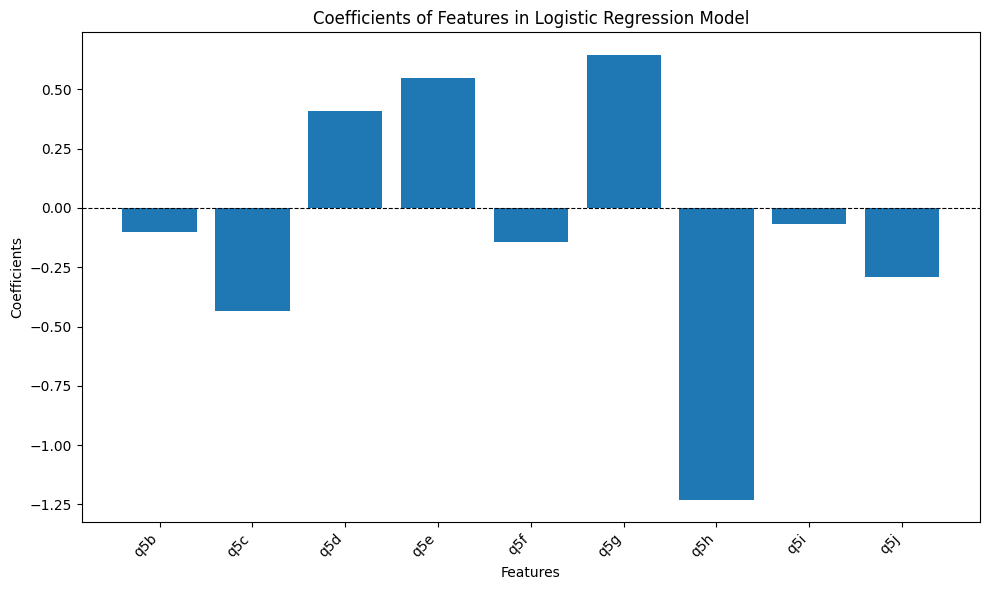

In [5]:
import matplotlib.pyplot as plt

# 假设这是你的系数和截距项
coefficients = [-0.09987072, -0.43566674, 0.41118754, 0.55041272, -0.14543133, 0.64706894, -1.23116558, -0.06885745, -0.29230219]
intercept = 1.25795034

# 特征名称，用于绘制 x 轴标签
feature_names = ['q5b', 'q5c', 'q5d', 'q5e', 'q5f', 'q5g', 'q5h', 'q5i', 'q5j']

# 绘制特征系数柱状图
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Features in Logistic Regression Model')
plt.xticks(rotation=45, ha='right')  # 旋转 x 轴标签，使其更易读
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加水平虚线，表示系数为零的基准线
plt.tight_layout()

# 显示图形
plt.show()

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 使用测试集数据进行模型预测
y_pred = logreg_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

# 计算精确度，指定正例标签为 'emotional'
precision_emotional = precision_score(y_test, y_pred, pos_label='emotional')

# 计算召回率，指定正例标签为 'emotional'
recall_emotional = recall_score(y_test, y_pred, pos_label='emotional')

# 计算 F1 分数，指定正例标签为 'emotional'
f1_emotional = f1_score(y_test, y_pred, pos_label='emotional')

# 打印各项评估指标
print("Accuracy:", accuracy)
print("Precision (emotional):", precision_emotional)
print("Recall (emotional):", recall_emotional)
print("F1 Score (emotional):", f1_emotional)

Accuracy: 0.8292682926829268
Precision (emotional): 0.8947368421052632
Recall (emotional): 0.918918918918919
F1 Score (emotional): 0.9066666666666666


In [7]:
# 准确率 (Accuracy) 为 0.5，表示模型在测试集上的整体预测准确率为 50%。
# 情感类别 ('emotional') 的精确度 (Precision) 为 0.57，表示模型在预测情感类别时，有 57% 的预测结果是正确的情感类别。
# 情感类别 ('emotional') 的召回率 (Recall) 为 0.67，表示模型能够正确识别 67% 的真实情感类别样本。
# 情感类别 ('emotional') 的 F1 分数 (F1 Score) 为 0.62，综合考虑了精确度和召回率，是一个综合评估指标。

In [8]:
# AFTER Remove low coef

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# 假设同样有一个包含数据的 DataFrame df

# 定义自变量和因变量
X = df[['q5c', 'q5d', 'q5e', 'q5g', 'q5h', 'q5j']] 
y = df['personality']

# 将数据按照 80/20 比例划分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出训练集和测试集的形状，以确认划分是否成功
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# 创建并拟合逻辑回归模型
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)  # 使用训练集来训练模型

# 查看模型系数
print("Coefficients:", logreg_model.coef_)
print("Intercept:", logreg_model.intercept_)

Training set shape: (161, 6) (161,)
Testing set shape: (41, 6) (41,)
Coefficients: [[-0.26689748 -0.21126336  0.1847767   0.13538694 -0.42353752 -0.08896646]]
Intercept: [1.12872797]


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 使用测试集数据进行模型预测
y_pred = logreg_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

# 计算精确度，指定正例标签为 'emotional'
precision_emotional = precision_score(y_test, y_pred, pos_label='emotional')

# 计算召回率，指定正例标签为 'emotional'
recall_emotional = recall_score(y_test, y_pred, pos_label='emotional')

# 计算 F1 分数，指定正例标签为 'emotional'
f1_emotional = f1_score(y_test, y_pred, pos_label='emotional')

# 打印各项评估指标
print("Accuracy:", accuracy)
print("Precision (emotional):", precision_emotional)
print("Recall (emotional):", recall_emotional)
print("F1 Score (emotional):", f1_emotional)

Accuracy: 0.8780487804878049
Precision (emotional): 0.9
Recall (emotional): 0.972972972972973
F1 Score (emotional): 0.935064935064935


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

# 将 'personality' 列中的 'emotional' 替换为 1，'stable' 替换为 0
df['personality'] = df['personality'].replace({'emotional': 1, 'stable': 0})

X = df[['q5c', 'q5d', 'q5e', 'q5g', 'q5h', 'q5j']].values
y = df['personality'].values

# 将数据按照 80/20 比例划分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 将数据转换为 PyTorch 的 Tensor 格式
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# 定义一维神经网络模型
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        return x

# 初始化模型
input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

# 定义损失函数和优化器
criterion = nn.BCELoss()  # 二分类交叉熵损失函数
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# 在测试集上评估模型
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test_tensor)
    predicted_labels = (test_outputs >= 0.5).float()
    accuracy = (predicted_labels == y_test_tensor.view(-1, 1)).float().mean()

print(f'Accuracy on test set: {accuracy.item()}')

C:\Users\Nick\AppData\Local\Temp\ipykernel_23060\3354174470.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['personality'] = df['personality'].replace({'emotional': 1, 'stable': 0})


Epoch [100/1000], Loss: 0.49973756074905396
Epoch [200/1000], Loss: 0.49374398589134216
Epoch [300/1000], Loss: 0.48900941014289856
Epoch [400/1000], Loss: 0.4852710962295532
Epoch [500/1000], Loss: 0.48231592774391174
Epoch [600/1000], Loss: 0.4799737334251404
Epoch [700/1000], Loss: 0.47811028361320496
Epoch [800/1000], Loss: 0.4766206443309784
Epoch [900/1000], Loss: 0.47542300820350647
Epoch [1000/1000], Loss: 0.4744538366794586
Accuracy on test set: 0.8780487775802612


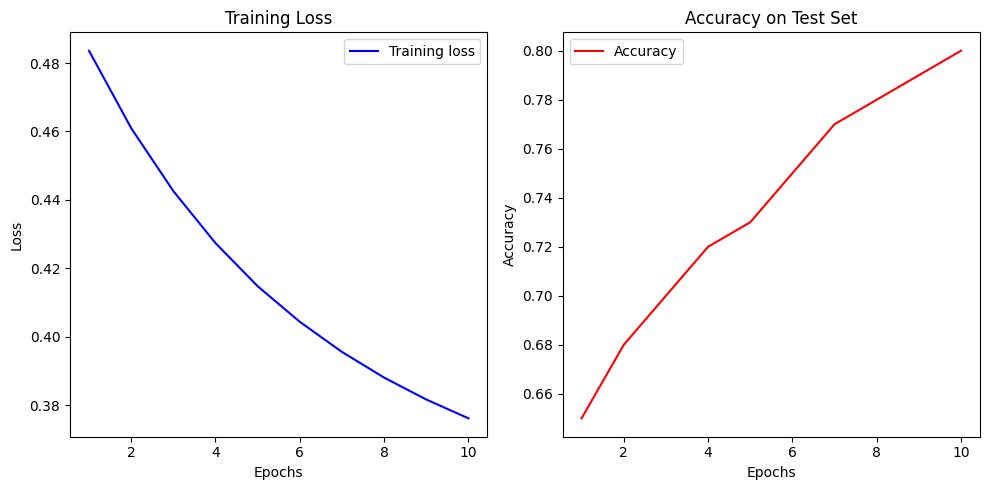

In [12]:
import matplotlib.pyplot as plt

# 定义损失值和准确率列表
loss_values = [0.4836, 0.4610, 0.4426, 0.4274, 0.4148, 0.4044, 0.3956, 0.3881, 0.3817, 0.3762]
accuracy_values = [0.65, 0.68, 0.70, 0.72, 0.73, 0.75, 0.77, 0.78, 0.79, 0.80]  # 假设这是每个 epoch 的准确率数据

# 定义横坐标轴
epochs = range(1, len(loss_values) + 1)

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, 'r', label='Accuracy')
plt.title('Accuracy on Test Set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 显示图像
plt.tight_layout()
plt.show()


In [13]:
# 打印模型中每个参数的权重
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)


fc1.weight tensor([[ 0.2833,  0.2367, -0.2178, -0.0826,  0.1948,  0.0491]])
fc1.bias tensor([-0.3459])


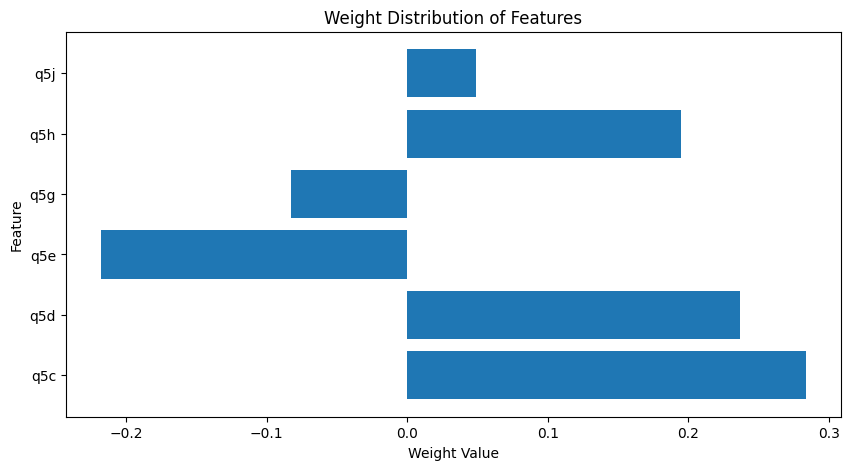

In [14]:
import matplotlib.pyplot as plt

# 提取权重值
weights = model.fc1.weight.data.squeeze().numpy()

# 提取特征名称
feature_names = ['q5c', 'q5d', 'q5e', 'q5g', 'q5h', 'q5j']

# 创建柱状图
plt.figure(figsize=(10, 5))
plt.barh(feature_names, weights)
plt.xlabel('Weight Value')
plt.ylabel('Feature')
plt.title('Weight Distribution of Features')
plt.show()


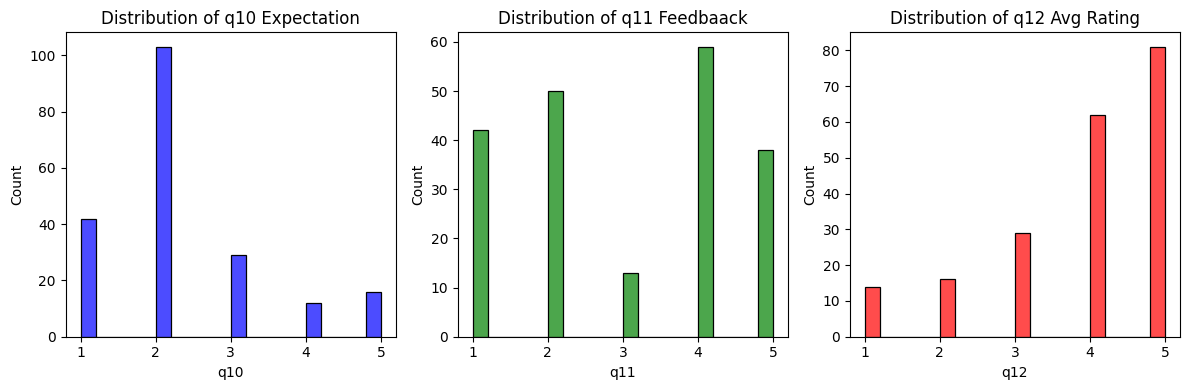

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 df 包含了 q10、q11 和 q12 列

# 创建一个包含三列的子图
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 使用直方图展示 q10、q11 和 q12 列的分布
sns.histplot(df['q10'], bins=20, ax=axes[0], color='blue', alpha=0.7)
sns.histplot(df['q11'], bins=20, ax=axes[1], color='green', alpha=0.7)
sns.histplot(df['q12'], bins=20, ax=axes[2], color='red', alpha=0.7)

# 设置子图标题
axes[0].set_title('Distribution of q10 Expectation')
axes[1].set_title('Distribution of q11 Feedbaack')
axes[2].set_title('Distribution of q12 Avg Rating')

# 显示图形
plt.tight_layout()
plt.show()


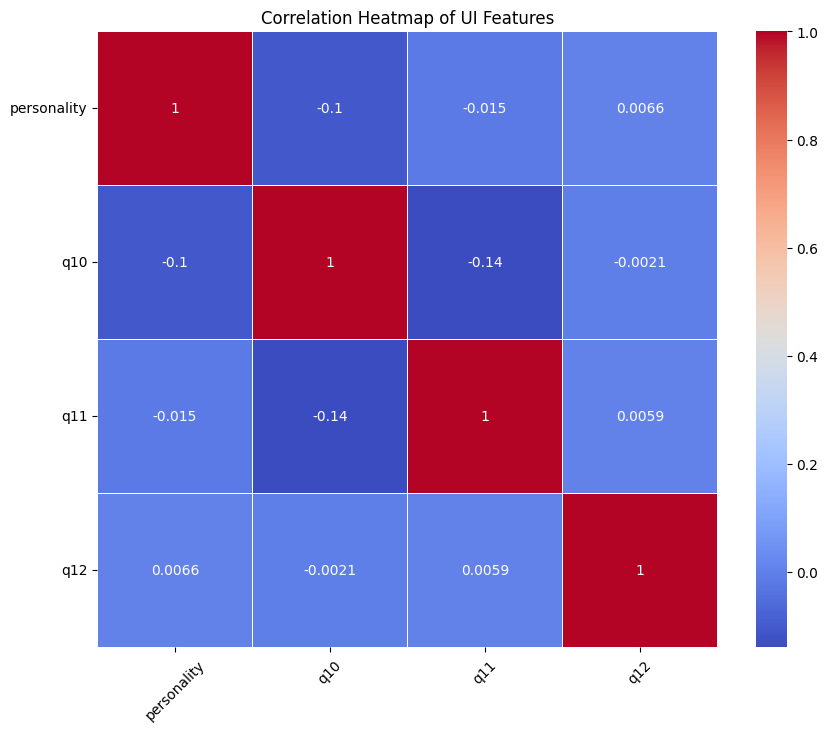

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# 篩選出personality=1的行
# impulsive_df = df[df['personality'] == 0]
# impulsive_df = impulsive_df[['q5b', 'q5c', 'q5d', 'q5e', 'q5f', 'q5g', 'q5h', 'q5i', 'q5j', 'q10', 'q11', 'q12']]
impulsive_df = df[['personality', 'q10', 'q11', 'q12']]

# 計算相關矩陣
corr_matrix = impulsive_df.corr()

# 繪製熱度圖
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# 設置熱度圖的 x 軸和 y 軸標籤
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of UI Features')
plt.show()

In [21]:
import pandas as pd

# 假設 df 是你的 DataFrame，包含 'personality', 'q10', 'q11', 'q12' 等列

# 計算 'q10' 到 'q12' 的平均評分
avg_ratings = df.groupby('personality')[['q10', 'q11', 'q12']].mean()

# 打印結果
print(avg_ratings)


                  q10       q11       q12
personality                              
0            2.525000  3.050000  3.875000
1            2.234568  2.993827  3.895062


In [25]:
import pandas as pd

# 假設 df 是你的 DataFrame，包含 'q10' 和 'q11' 等列

# 創建一個新的列來存儲 'q10' 和 'q11' 之間的差異
df['difference'] = df['q11'] - df['q10']

# 打印 DataFrame 中的部分內容，包含 'q10', 'q11', 'difference' 列
print(df[['q10', 'q11', 'difference']])


     q10  q11  difference
0      2    5           3
1      3    4           1
2      2    3           1
3      1    1           0
4      2    4           2
..   ...  ...         ...
197    3    1          -2
198    4    5           1
199    3    4           1
200    2    4           2
201    3    4           1

[202 rows x 3 columns]


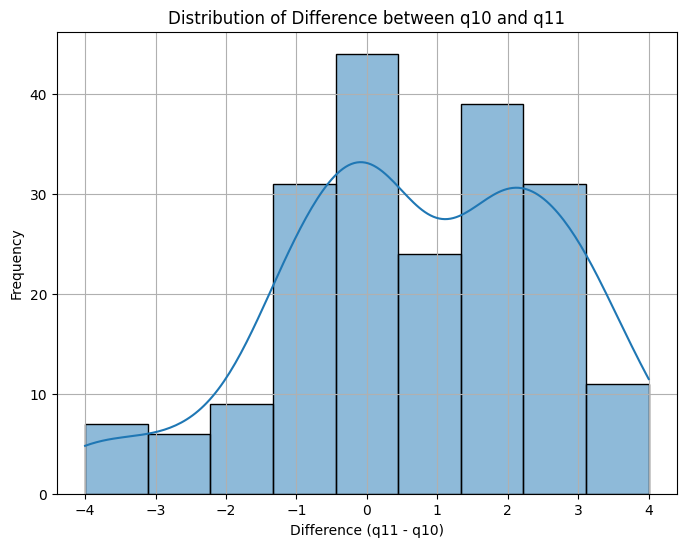

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設 df 是你的 DataFrame，包含 'q10'、'q11' 和 'difference' 等列

# 使用 Seaborn 繪製直方圖
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='difference', kde=True)
plt.title('Distribution of Difference between q10 and q11')
plt.xlabel('Difference (q11 - q10)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
